In [3]:
!pip install sodapy


In [186]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import numpy as np
import pandas as pd
from sodapy import Socrata

from time import sleep

import matplotlib.pyplot as plt
import seaborn as sns


links 

https://stackoverflow.com/questions/43351062/querying-from-soda-database-using-socrata-client-get-in-python

https://dev.socrata.com/foundry/data.cityofnewyork.us/76xm-jjuj

In [47]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:

client = Socrata("data.cityofnewyork.us", None)

results = []

for n in range(3):
    if n<1:
        new_results = client.get("76xm-jjuj", limit=200)
    else:
        query_text = f'cad_incident_id < {min_id}'
        new_results = client.get("76xm-jjuj", where=query_text, limit=200)
    results += new_results
    results_df = pd.DataFrame(results)
    min_id = results_df['cad_incident_id'].min()
    
    # save to disk. I'm doing this after every pull in case I run into errors:
    results_df.to_csv('./data/ems.csv')
    print(n)
    # Pause between pulls so I don't set off any defenses:
    sleep(15)

0
1
2
3
4


In [48]:
results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   cad_incident_id                 1000 non-null   object
 1   incident_datetime               1000 non-null   object
 2   initial_call_type               1000 non-null   object
 3   initial_severity_level_code     1000 non-null   object
 4   final_call_type                 1000 non-null   object
 5   final_severity_level_code       1000 non-null   object
 6   first_assignment_datetime       971 non-null    object
 7   valid_dispatch_rspns_time_indc  1000 non-null   object
 8   dispatch_response_seconds_qy    1000 non-null   object
 9   first_activation_datetime       967 non-null    object
 10  first_on_scene_datetime         925 non-null    object
 11  valid_incident_rspns_time_indc  1000 non-null   object
 12  incident_response_seconds_qy    925 non-null    o

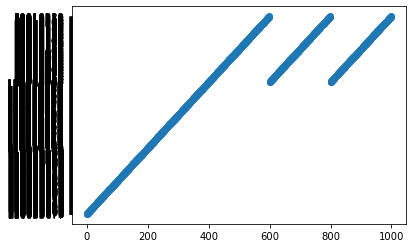

In [54]:
plt.scatter(range(1000),results_df['cad_incident_id'])


In [62]:
for n in [405, 605, 805]:
    print(results_df['cad_incident_id'][n], results_df['incident_datetime'][n])

50010006 2005-01-01T00:01:06.000
50010006 2005-01-01T00:01:06.000
50010006 2005-01-01T00:01:06.000


In [65]:
results = results[0:600]
print(len(results))

600


In [71]:
results_df = pd.DataFrame(results)
results_df.to_csv('./data/ems.csv',index=False)